# Wczytanie danych

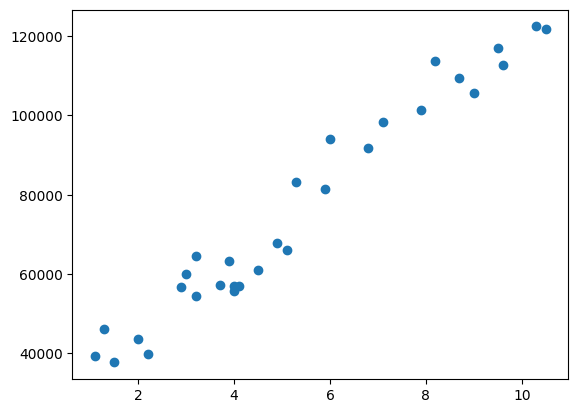

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

salary = pd.read_csv("data/salary.csv")

plt.scatter(salary["YearsExperience"], salary["Salary"])

# Regresja

In [2]:
y = salary["Salary"]
x = salary.drop(columns=["Salary"])

In [3]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [4]:
model.intercept_

np.float64(25792.20019866871)

Wyraz wolny wynosi 25792$, co oznacza, że przy zerowym doświadczeniu wynagrodzenie wynosi 25792$.

In [5]:
model.coef_

array([9449.96232146])

Współczynik kierunkowy wynosi 9449$, co oznacza, że wzrost liczby lat doświadczenia o 1 rok wiąże się ze średnim wzrostem zarobków o 9449$. 

wynagrodzenie = 9449 * doświadczenie + 25792

## Ocena jakości modelu

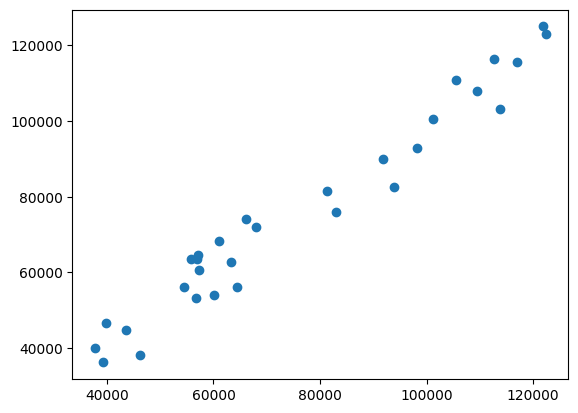

In [6]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

y_pred = model.predict(x)

plt.scatter(y, y_pred)

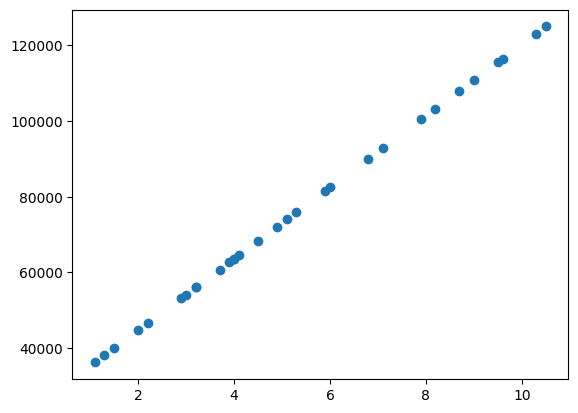

In [7]:
plt.scatter(salary["YearsExperience"], y_pred)

In [8]:
import numpy as np

print("R^2:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("MAE:", mean_absolute_error(y, y_pred))

R^2: 0.9569566641435086
MSE: 31270951.722280968
RMSE: 5592.043608760662
MAE: 4644.2012894435375


Współczynnik determinacji R2 wynosi 0,96 (96%), co oznacza, że model wyjaśnia 96% zmienności wynagrodzenia.
RMSE wynosi 5592$ co oznacza, że średni błąd modelu wynosi 5592$.
MAE wynosi 4644$, co oznacza, że średni błąd bezwzględny wynosi 4644$.

In [ ]:
! pip install statsmodels

In [9]:
import statsmodels.api as sm

x_const = sm.add_constant(x)
model_sm = sm.OLS(y, x_const).fit()

print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           1.14e-20
Time:                        08:40:01   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.579e+04   2273.053     

# Regresja wieloraka

In [10]:
insurance = pd.read_csv("data/insurance.csv")

In [12]:
insurance_num = insurance.drop(columns=["sex", "smoker", "region"])
correlations = insurance_num.corr()

In [13]:
! pip install seaborn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: >

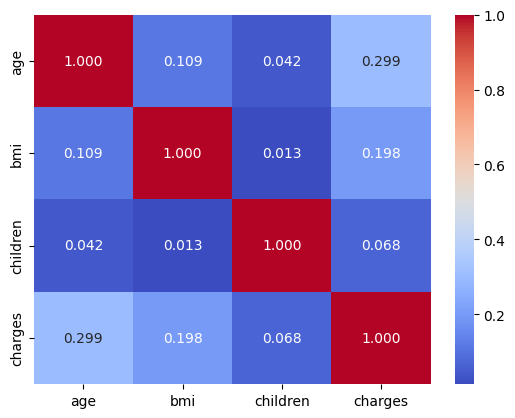

In [18]:
from seaborn import heatmap

heatmap(correlations, annot=True, cmap="coolwarm", fmt=".3f")

In [25]:
insurance_one_hot = pd.get_dummies(insurance[["sex", "smoker", "region"]], dtype=int, drop_first=True)
insurance_one_hot

insurance_encoded = pd.concat([insurance_num, insurance_one_hot], axis=1)

In [26]:
x_insurance = insurance_encoded.drop(columns=["charges"])
y_insurance = insurance["charges"]

x_insurance_const = sm.add_constant(x_insurance)
model_insurance = sm.OLS(y_insurance, x_insurance_const).fit()
print(model_insurance.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:               sob., 14 cze 2025   Prob (F-statistic):               0.00
Time:                        09:13:14   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.194e+04    987.819  

Wyraz wolny = -11940$ - wyraz wolny nie ma sensu w tym przypadku, ponieważ nie ma możliwości, aby osoba miała 0 lat, 0 bmi, itd.
Wiek = 256,85$ - wzrost wieku o 1 rok wiąże się ze średnim wzrostem wysokości składki o 256,85$, ceteris paribus.
Bmi = 339,19$ - wzrost bmi o 1 jednostkę wiąże się ze średnim wzrostem wysokości składki o 339,19$, ceteris paribus.
Children = 475,5$ - wzrost liczby dzieci o 1 dziecko wiąże się ze średnim wzrostem wysokości składki o 475,5$, ceteris paribus.
Sex_male = -131,31$ - bycie mężczyzną wiąże się ze średnim poziomem składki niższym o 131,31$ w porównaniu do kobiet, ceteris paribus.
Smoker_yes = 23850$ - bycie palaczem wiąże się ze średnim poziomem składki wyższym o 23850$ w porównaniu do niepalaczy, ceteris paribus.
Region_northwest = -352,96$ - mieszkanie w regionie północno-zachodnim wiąże się ze średnim poziomem składki niższym o 352,96$ w porównaniu do regionu northeast (północno-wschodniego), ceteris paribus.

Usunięcie cechy nieistotnej

In [30]:
x_insurance = insurance_encoded.drop(columns=["charges", "sex_male"])
y_insurance = insurance["charges"]

x_insurance_const = sm.add_constant(x_insurance)
model_insurance = sm.OLS(y_insurance, x_insurance_const).fit()
print(model_insurance.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     572.7
Date:               sob., 14 cze 2025   Prob (F-statistic):               0.00
Time:                        09:35:13   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1330   BIC:                         2.715e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.199e+04    978.762  

Analiza rozkładu reszt

In [31]:
residuals = model_insurance.resid
residuals

0       -8332.973406
1       -1786.613459
2       -2320.800752
3       18157.413783
4       -1794.482182
            ...     
1333    -1817.822068
1334    -1239.449037
1335    -2450.852873
1336      823.596671
1337    -7872.857757
Length: 1338, dtype: float64

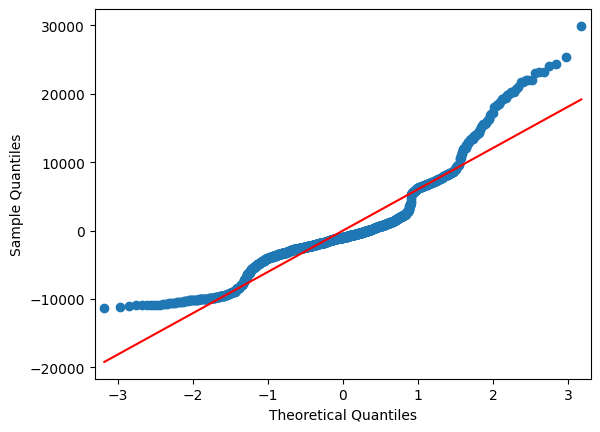

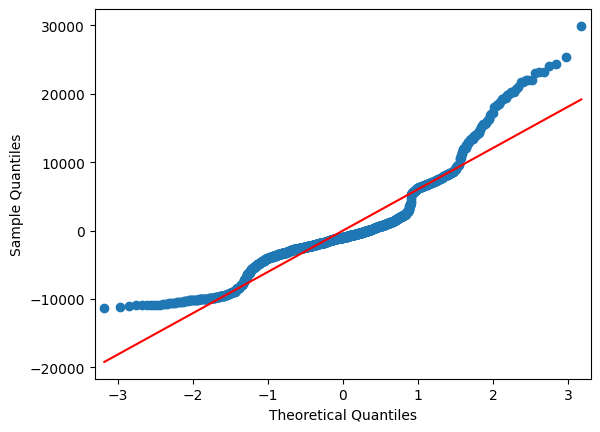

In [32]:
sm.qqplot(residuals, line="s")

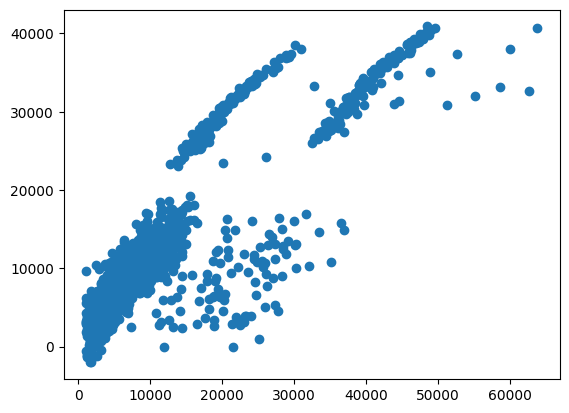

In [33]:
pred_insurance = model_insurance.predict(x_insurance_const)
plt.scatter(y_insurance, pred_insurance)

Wartości odstające

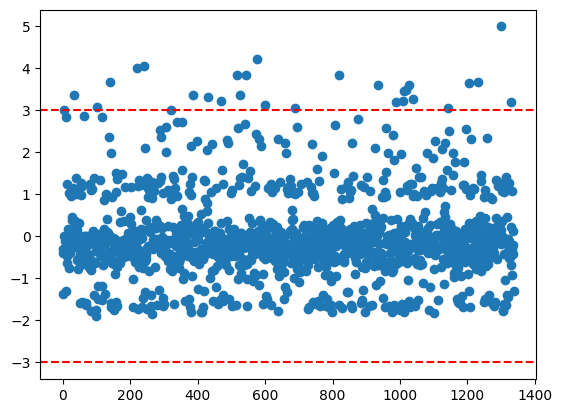

In [37]:
infulence = model_insurance.get_influence()

residuals_studentized = infulence.resid_studentized_external

plt.scatter(range(len(residuals_studentized)), residuals_studentized)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')

outliers_residuals = residuals_studentized[np.abs(residuals_studentized) > 3]

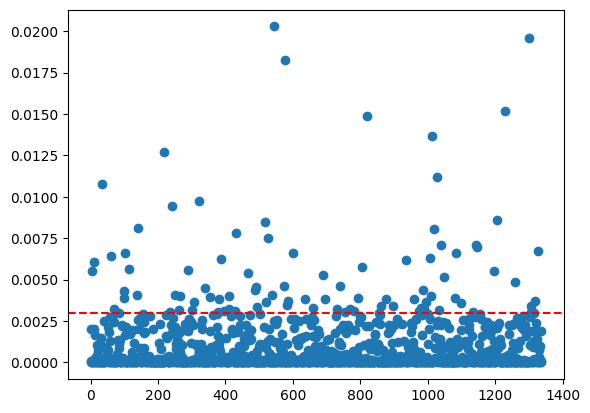

In [42]:
cooks_d = infulence.cooks_distance[0]
threshold = 4 / len(cooks_d)

plt.scatter(range(len(cooks_d)), cooks_d)
plt.axhline(y=threshold, color='r', linestyle='--')

outliers_cooks = cooks_d[cooks_d > threshold]

Usunięcie wartości odstających

In [44]:
indices_outliers_cooks = np.where(cooks_d > threshold)[0]
indices_outliers_residuals = np.where(np.abs(residuals_studentized) > 3)[0]
print("Indices of outliers based on Cook's distance:", indices_outliers_cooks)
print("Indices of outliers based on studentized residuals:", indices_outliers_residuals)

Indices of outliers based on Cook's distance: [   3    9   34   62   69   85   98   99  102  115  138  140  219  235
  242  250  262  266  289  301  306  321  340  355  379  380  387  397
  411  412  429  430  468  488  491  494  516  520  526  539  543  573
  577  583  587  599  637  661  688  696  730  739  754  770  780  793
  806  819  854  860  876  896  936  959  975  980  987  989  994 1008
 1011 1012 1019 1027 1033 1039 1047 1080 1085 1100 1134 1142 1146 1195
 1206 1230 1258 1300 1306 1307 1317 1328]
Indices of outliers based on studentized residuals: [   3   34  102  140  219  242  387  430  468  516  526  543  577  599
  688  819  936  987 1008 1012 1019 1027 1039 1142 1206 1230 1300 1328]


In [45]:
x_insurance_no_outliers = x_insurance.drop(index=indices_outliers_cooks)
y_insurance_no_outliers = y_insurance.drop(index=indices_outliers_cooks)

x_insurance_no_outliers_const = sm.add_constant(x_insurance_no_outliers)
model_insurance = sm.OLS(y_insurance_no_outliers, x_insurance_no_outliers_const).fit()
print(model_insurance.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     1016.
Date:               sob., 14 cze 2025   Prob (F-statistic):               0.00
Time:                        10:05:03   Log-Likelihood:                -12231.
No. Observations:                1246   AIC:                         2.448e+04
Df Residuals:                    1238   BIC:                         2.452e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1.076e+04    762.144  

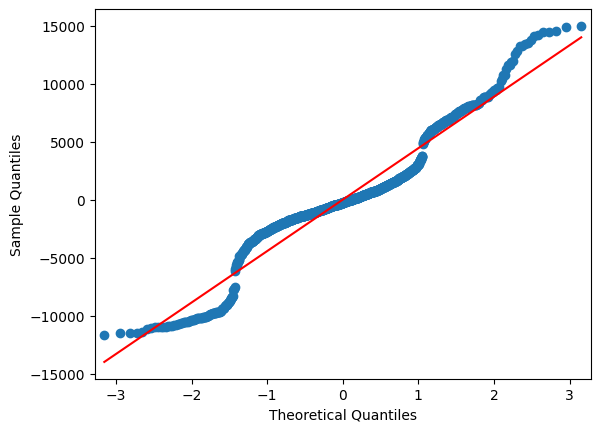

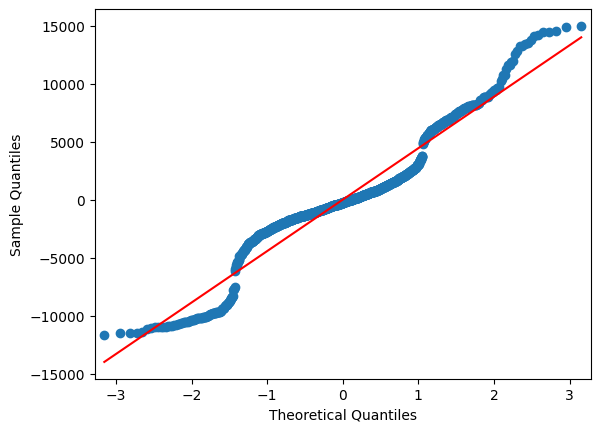

In [46]:
sm.qqplot(model_insurance.resid, line="s")

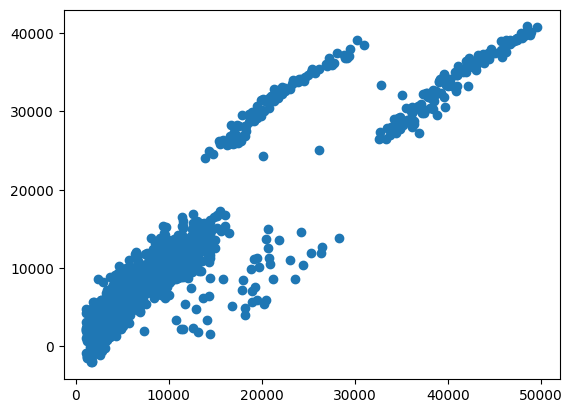

In [48]:
pred = model_insurance.predict(x_insurance_no_outliers_const)
plt.scatter(y_insurance_no_outliers, pred)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

print("MAE:", mean_absolute_error(y_insurance_no_outliers, pred))
print("RSME:", np.sqrt(mean_squared_error(y_insurance_no_outliers, pred)))
print("MAPE:", mean_absolute_percentage_error(y_insurance_no_outliers, pred))

MAE: 3014.1204225784895
RSME: 4435.345431058353
MAPE: 0.3220488274435848


# Drzewa decyzyjne

In [60]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

tree_model = DecisionTreeRegressor(max_depth=4)
tree_model.fit(x_insurance_no_outliers, y_insurance_no_outliers)

DecisionTreeRegressor(max_depth=4)

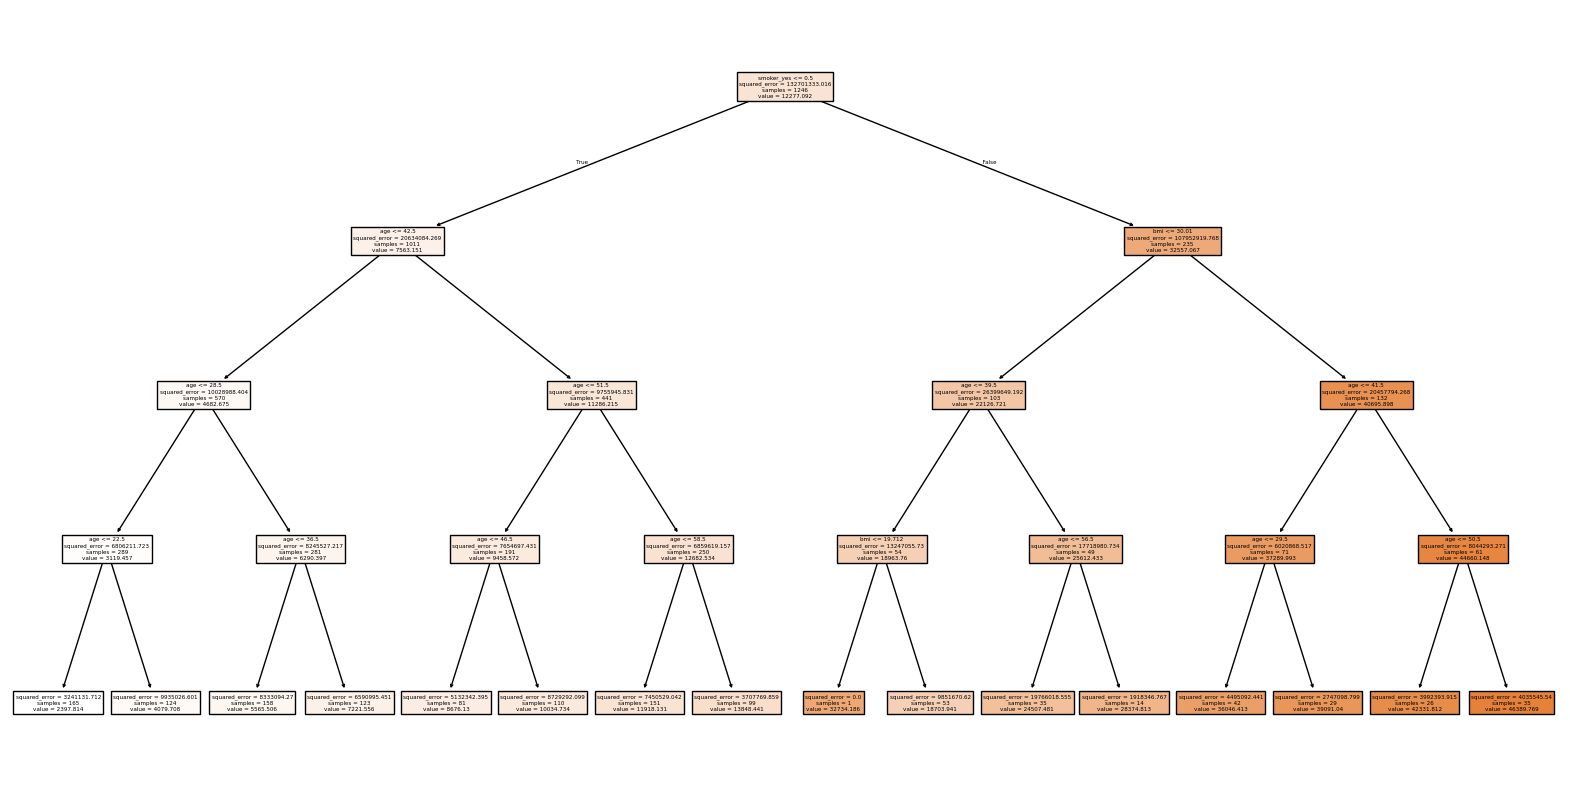

In [61]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=x_insurance_no_outliers.columns, filled=True)
plt.show()

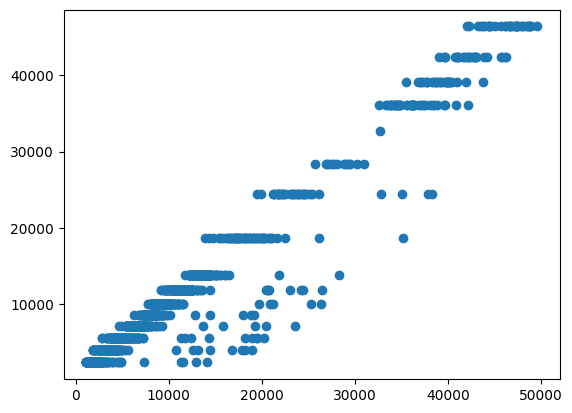

In [62]:
y_pred_tree = tree_model.predict(x_insurance_no_outliers)
plt.scatter(y_insurance_no_outliers, y_pred_tree)

In [63]:
print("MAE:", mean_absolute_error(y_insurance_no_outliers, y_pred_tree))
print("RSME:", np.sqrt(mean_squared_error(y_insurance_no_outliers, y_pred_tree)))
print("MAPE:", mean_absolute_percentage_error(y_insurance_no_outliers, y_pred_tree))

MAE: 1391.7605087378881
RSME: 2614.382442581552
MAPE: 0.17968587268564468


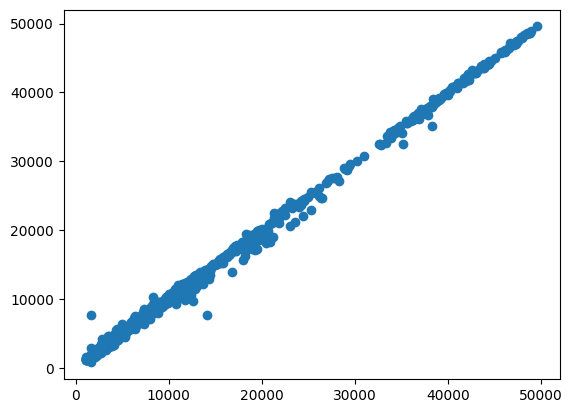

In [64]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(x_insurance_no_outliers, y_insurance_no_outliers)
y_pred_xgb = xgb_model.predict(x_insurance_no_outliers)
plt.scatter(y_insurance_no_outliers, y_pred_xgb)

In [65]:
print("MAE:", mean_absolute_error(y_insurance_no_outliers, y_pred_xgb))
print("RSME:", np.sqrt(mean_squared_error(y_insurance_no_outliers, y_pred_xgb)))
print("MAPE:", mean_absolute_percentage_error(y_insurance_no_outliers, y_pred_xgb))

MAE: 285.4940179507988
RSME: 519.9588557168491
MAPE: 0.04559800193994069


# Zadanie

<Axes: >

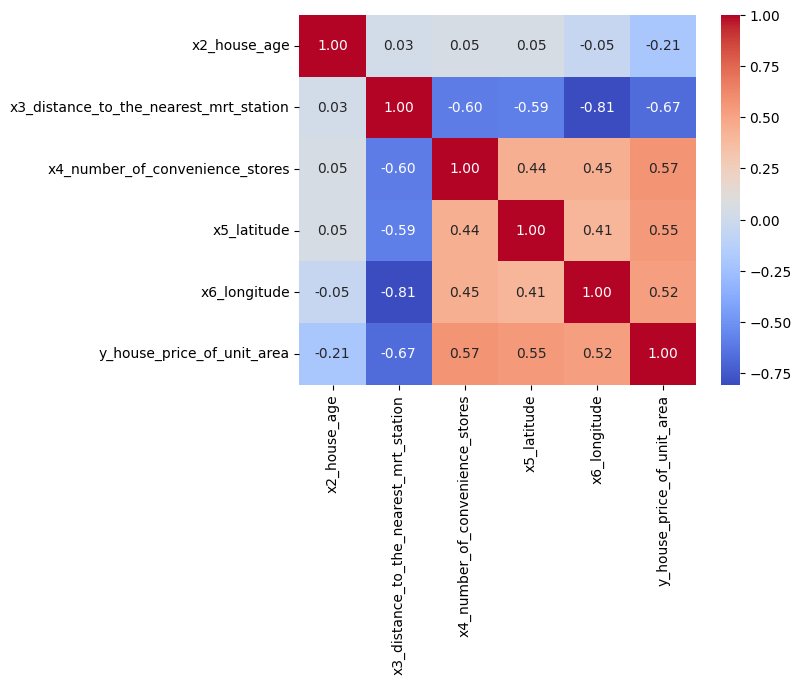

In [67]:
from janitor import clean_names

real_estate = pd.read_csv("data/real_estate.csv")
real_estate = real_estate.clean_names()

real_estate_columns = real_estate.drop(columns=["no", "x1_transaction_date"])

correlations = real_estate_columns.corr()
heatmap(correlations, annot=True, cmap='coolwarm', fmt='.2f')

In [68]:
x_real_estate = real_estate_columns.drop(columns=["y_house_price_of_unit_area"])
y_real_estate = real_estate_columns["y_house_price_of_unit_area"]

x_real_estate_const = sm.add_constant(x_real_estate)
model_real_estate = sm.OLS(y_real_estate, x_real_estate_const).fit()
print(model_real_estate.summary())

                                OLS Regression Results                                
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.571
Model:                                    OLS   Adj. R-squared:                  0.566
Method:                         Least Squares   F-statistic:                     108.7
Date:                       sob., 14 cze 2025   Prob (F-statistic):           9.34e-73
Time:                                10:47:56   Log-Likelihood:                -1492.4
No. Observations:                         414   AIC:                             2997.
Df Residuals:                             408   BIC:                             3021.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [69]:
x_real_estate = real_estate_columns.drop(columns=["y_house_price_of_unit_area", "x6_longitude"])
y_real_estate = real_estate_columns["y_house_price_of_unit_area"]

x_real_estate_const = sm.add_constant(x_real_estate)
model_real_estate = sm.OLS(y_real_estate, x_real_estate_const).fit()
print(model_real_estate.summary())

                                OLS Regression Results                                
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.571
Model:                                    OLS   Adj. R-squared:                  0.567
Method:                         Least Squares   F-statistic:                     136.2
Date:                       sob., 14 cze 2025   Prob (F-statistic):           7.60e-74
Time:                                10:49:41   Log-Likelihood:                -1492.5
No. Observations:                         414   AIC:                             2995.
Df Residuals:                             409   BIC:                             3015.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

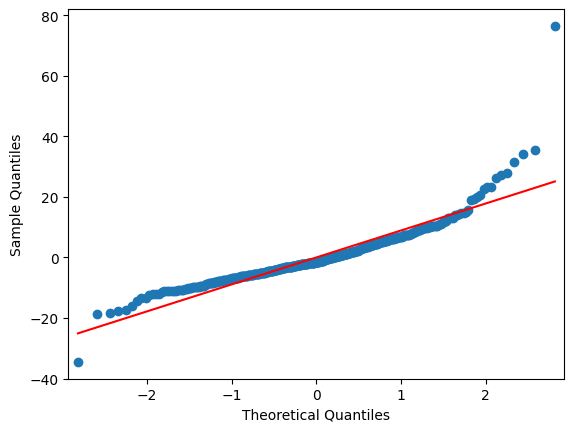

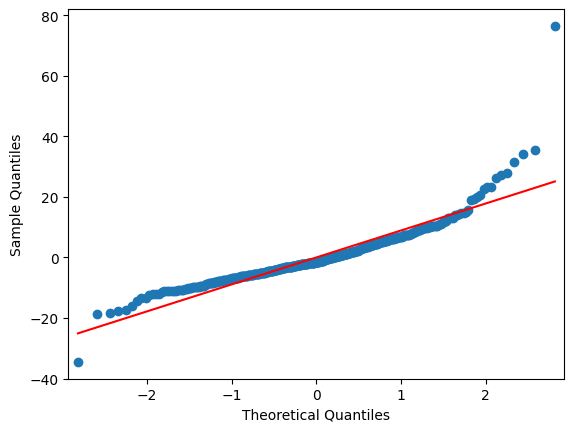

In [70]:
sm.qqplot(model_real_estate.resid, line='s')

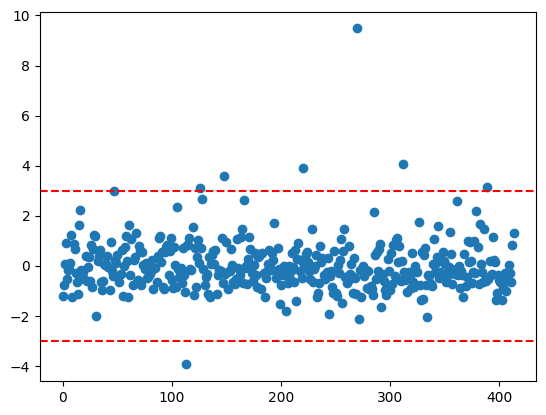

In [71]:
influence = model_real_estate.get_influence()

residuals_studentized = influence.resid_studentized_external

plt.scatter(range(len(residuals_studentized)), residuals_studentized)
plt.axhline(y=3, color='r', linestyle='--')
plt.axhline(y=-3, color='r', linestyle='--')

outliers_resid = residuals_studentized[np.abs(residuals_studentized) > 3]

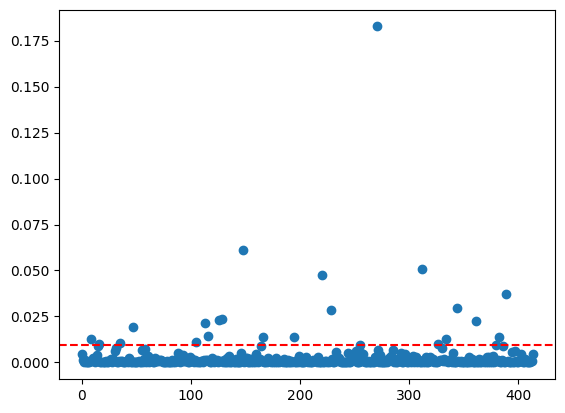

In [72]:
cooks_d = influence.cooks_distance[0]
threshold = 4 / len(cooks_d)

plt.scatter(range(len(cooks_d)), cooks_d)
plt.axhline(y=threshold, color='r', linestyle='--')

outliers_cooks = cooks_d[cooks_d > threshold]

In [77]:
indices_outliers_cooks = np.where(cooks_d > threshold)[0]
indices_outliers_resid = np.where(np.abs(residuals_studentized) > 3)[0]
print("Outliers based on Cook's distance:", indices_outliers_cooks)
print("Outliers based on Studentized residuals:", indices_outliers_resid)

Outliers based on Cook's distance: [  8  16  35  47 105 113 116 126 128 148 166 194 220 228 255 270 312 326
 334 344 361 379 382 389]
Outliers based on Studentized residuals: [113 126 148 220 270 312 389]


In [74]:
x_real_estate_no_outliers = x_real_estate.drop(index=indices_outliers_cooks)
y_real_estate_no_outliers = y_real_estate.drop(index=indices_outliers_cooks)

x_real_estate_no_outliers_const = sm.add_constant(x_real_estate_no_outliers)
model_real_estate = sm.OLS(y_real_estate_no_outliers, x_real_estate_no_outliers_const).fit()
print(model_real_estate.summary())

                                OLS Regression Results                                
Dep. Variable:     y_house_price_of_unit_area   R-squared:                       0.729
Model:                                    OLS   Adj. R-squared:                  0.727
Method:                         Least Squares   F-statistic:                     259.5
Date:                       sob., 14 cze 2025   Prob (F-statistic):          7.07e-108
Time:                                10:49:42   Log-Likelihood:                -1265.0
No. Observations:                         390   AIC:                             2540.
Df Residuals:                             385   BIC:                             2560.
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

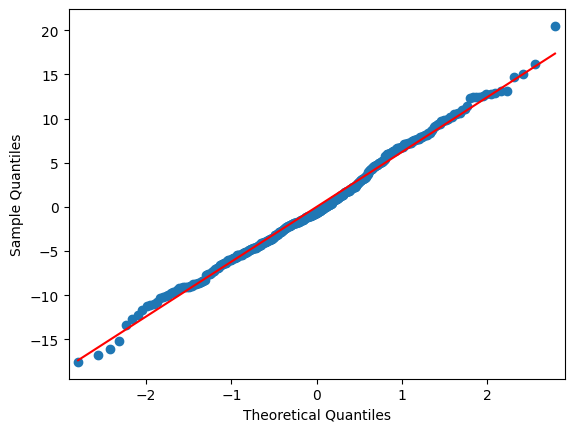

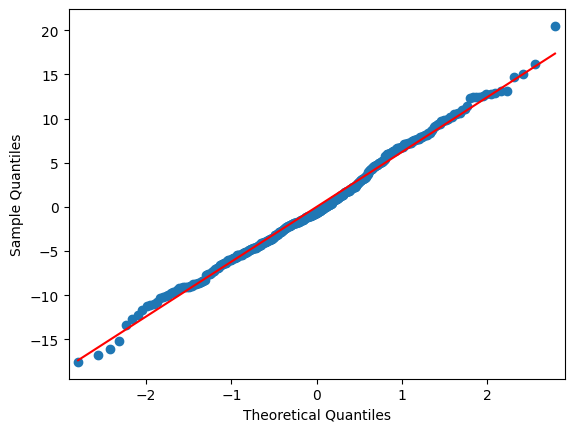

In [75]:
sm.qqplot(model_real_estate.resid, line='s')